# Collaboration and Competition

---

In this notebook, you will learn how to use the Unity ML-Agents environment for the third project of the [Deep Reinforcement Learning Nanodegree](https://www.udacity.com/course/deep-reinforcement-learning-nanodegree--nd893) program.

### 1. Start the Environment

We begin by importing the necessary packages.  If the code cell below returns an error, please revisit the project instructions to double-check that you have installed [Unity ML-Agents](https://github.com/Unity-Technologies/ml-agents/blob/master/docs/Installation.md) and [NumPy](http://www.numpy.org/).

In [1]:
from unityagents import UnityEnvironment
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Next, we will start the environment!  **_Before running the code cell below_**, change the `file_name` parameter to match the location of the Unity environment that you downloaded.

- **Mac**: `"path/to/Tennis.app"`
- **Windows** (x86): `"path/to/Tennis_Windows_x86/Tennis.exe"`
- **Windows** (x86_64): `"path/to/Tennis_Windows_x86_64/Tennis.exe"`
- **Linux** (x86): `"path/to/Tennis_Linux/Tennis.x86"`
- **Linux** (x86_64): `"path/to/Tennis_Linux/Tennis.x86_64"`
- **Linux** (x86, headless): `"path/to/Tennis_Linux_NoVis/Tennis.x86"`
- **Linux** (x86_64, headless): `"path/to/Tennis_Linux_NoVis/Tennis.x86_64"`

For instance, if you are using a Mac, then you downloaded `Tennis.app`.  If this file is in the same folder as the notebook, then the line below should appear as follows:
```
env = UnityEnvironment(file_name="Tennis.app")
```

In [2]:
env = UnityEnvironment(file_name="Tennis.app")

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: TennisBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 8
        Number of stacked Vector Observation: 3
        Vector Action space type: continuous
        Vector Action space size (per agent): 2
        Vector Action descriptions: , 


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [3]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

### 2. Examine the State and Action Spaces

In this environment, two agents control rackets to bounce a ball over a net. If an agent hits the ball over the net, it receives a reward of +0.1.  If an agent lets a ball hit the ground or hits the ball out of bounds, it receives a reward of -0.01.  Thus, the goal of each agent is to keep the ball in play.

The observation space consists of 8 variables corresponding to the position and velocity of the ball and racket. Two continuous actions are available, corresponding to movement toward (or away from) the net, and jumping. 

Run the code cell below to print some information about the environment.

In [4]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents 
num_agents = len(env_info.agents)
print('Number of agents:', num_agents)

# size of each action
action_size = brain.vector_action_space_size
print('Size of each action:', action_size)

# examine the state space 
states = env_info.vector_observations
state_size = states.shape[1]
print('There are {} agents. Each observes a state with length: {}'.format(states.shape[0], state_size))
print('The state for the first agent looks like:', states[0])
print('The state for the second agent looks like:', states[1])

Number of agents: 2
Size of each action: 2
There are 2 agents. Each observes a state with length: 24
The state for the first agent looks like: [ 0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.         -6.65278625 -1.5
 -0.          0.          6.83172083  6.         -0.          0.        ]
The state for the second agent looks like: [ 0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.         -6.4669857  -1.5
  0.          0.         -6.83172083  6.          0.          0.        ]


### 3. Take Random Actions in the Environment

In the next code cell, you will learn how to use the Python API to control the agents and receive feedback from the environment.

Once this cell is executed, you will watch the agents' performance, if they select actions at random with each time step.  A window should pop up that allows you to observe the agents.

Of course, as part of the project, you'll have to change the code so that the agents are able to use their experiences to gradually choose better actions when interacting with the environment!

In [5]:
all_scores = []
for i in range(1, 48):                                      # play game for 5 episodes
    env_info = env.reset(train_mode=True)[brain_name]     # reset the environment    
    states = env_info.vector_observations                  # get the current state (for each agent)
    scores = np.zeros(num_agents)                          # initialize the score (for each agent)
    steps = 0
    while True:
        steps +=1
        actions = np.random.randn(num_agents, action_size) # select an action (for each agent)
        actions = np.clip(actions, -1, 1)                  # all actions between -1 and 1
        env_info = env.step(actions)[brain_name]           # send all actions to tne environment
        next_states = env_info.vector_observations         # get next state (for each agent)
        rewards = env_info.rewards                         # get reward (for each agent)
        dones = env_info.local_done                        # see if episode finished
        scores += env_info.rewards                         # update the score (for each agent)
        states = next_states                               # roll over states to next time step
        if rewards[0]>0:
            print("{} Player one hit".format(i))
        if rewards[1]>0:
            print("{} Player two hit".format(i))
        
        if np.any(dones):                                  # exit loop if episode finished
            break
    all_scores.append(scores)
    #print('Score (max over agents) from episode {}: {}'.format(i, np.max(scores)))


7 Player two hit
16 Player two hit
19 Player one hit
36 Player two hit
37 Player two hit


(array([43.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  4.]),
 array([-0.01 ,  0.001,  0.012,  0.023,  0.034,  0.045,  0.056,  0.067,
         0.078,  0.089,  0.1  ]),
 <a list of 10 Patch objects>)

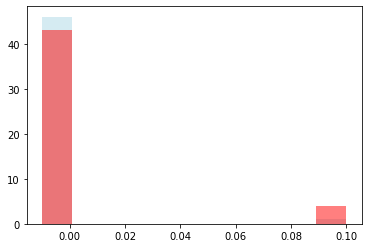

In [6]:
plt.hist([s[0] for s in all_scores],color='lightblue',alpha=0.5)
plt.hist([s[1] for s in all_scores],color='red',alpha=0.5)

In [7]:
from ddpg_extension.multi_agent_ddpg import MultiAgent
multi_agent = MultiAgent(number_of_agents=2,state_size=48, obs_sizes=[24,24], action_sizes=[2,2], random_seed=0)

INFO:multi_agent:multi_agent object created


In [8]:
env_info = env.reset(train_mode=True)[brain_name]     # reset the environment  
states = env_info.vector_observations                 # get the current state


(array([7.000e+00, 7.200e+01, 4.900e+02, 1.684e+03, 3.029e+03, 2.850e+03,
        1.448e+03, 3.630e+02, 5.400e+01, 3.000e+00]),
 array([-4.09939412, -3.26799145, -2.43658877, -1.60518609, -0.77378341,
         0.05761926,  0.88902194,  1.72042462,  2.5518273 ,  3.38322997,
         4.21463265]),
 <a list of 10 Patch objects>)

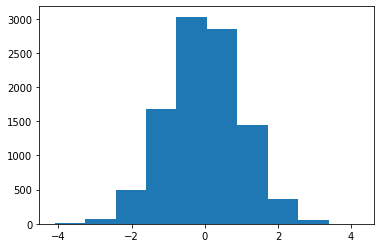

In [9]:
plt.hist([np.random.randn() for _ in range(10000)])

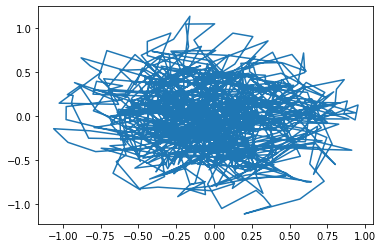

In [10]:
from ddpg_extension.multi_agent_ddpg import OUNoise

noise = OUNoise(2,0,mu=0, theta = 0.15, sigma=0.2)
noise_sample=[noise.sample() for _ in range(1000)]
plt.plot([a[0] for a in noise_sample],[a[1] for a in noise_sample])

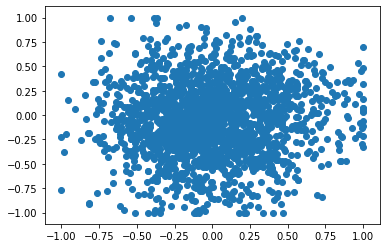

In [11]:
multi_agent.agents[0].epsilon=1.0
multi_agent.agents[1].epsilon=1.0
actionlist=[multi_agent.act(states) for _ in range(1000)]
plt.scatter([a[0] for a in actionlist],[a[1] for a in actionlist])


([array([0., 0., 0., 1., 1., 0., 0., 0., 0., 0.]),
  array([0., 0., 0., 1., 1., 0., 0., 0., 0., 0.]),
  array([0., 0., 1., 0., 1., 0., 0., 0., 0., 0.]),
  array([0., 0., 1., 1., 0., 0., 0., 0., 0., 0.]),
  array([0., 0., 0., 0., 2., 0., 0., 0., 0., 0.]),
  array([0., 0., 0., 0., 1., 1., 0., 0., 0., 0.]),
  array([0., 0., 0., 1., 0., 1., 0., 0., 0., 0.]),
  array([0., 0., 1., 0., 1., 0., 0., 0., 0., 0.]),
  array([0., 1., 0., 0., 0., 0., 1., 0., 0., 0.]),
  array([0., 0., 1., 1., 0., 0., 0., 0., 0., 0.]),
  array([0., 0., 1., 0., 0., 1., 0., 0., 0., 0.]),
  array([0., 0., 0., 1., 0., 0., 1., 0., 0., 0.]),
  array([0., 0., 1., 0., 0., 0., 0., 1., 0., 0.]),
  array([0., 0., 1., 0., 0., 0., 0., 0., 1., 0.]),
  array([1., 0., 0., 0., 0., 0., 1., 0., 0., 0.]),
  array([1., 0., 0., 0., 0., 1., 0., 0., 0., 0.]),
  array([1., 0., 0., 0., 0., 1., 0., 0., 0., 0.]),
  array([0., 1., 0., 1., 0., 0., 0., 0., 0., 0.]),
  array([0., 0., 2., 0., 0., 0., 0., 0., 0., 0.]),
  array([0., 1., 0., 1., 0., 0.

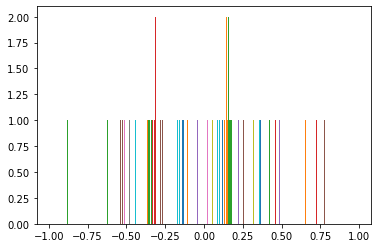

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.hist([a[0] for a in actionlist])

In [5]:
env_infos = env.step(np.concatenate(actions))[brain_name] 
env_info.local_done

NameError: name 'actions' is not defined

Episode 3	Average Score: 0.0000	 Hits: 0.0 	 Average Hits 0.00 	Score: 0.0000 -0.0100 [P1]
 [P2]
Episode 15	Average Score: 0.0067	 Hits: 0.0 	 Average Hits 0.13 	Score: -0.0100 0.0000 [P2]
Episode 25	Average Score: 0.0080	---- : 0.0 	 Average Hits 0.12 	Score: -0.0100 0.0000
Episode 40	Average Score: 0.0050	 Hits: 0.0 	 Average Hits 0.07 	Score: -0.0100 0.0000 [P2]
Episode 44	Average Score: 0.0066	 Hits: 0.0 	 Average Hits 0.09 	Score: -0.0100 0.0000 [P2]
Episode 46	Average Score: 0.0083	 Hits: 0.0 	 Average Hits 0.11 	Score: 0.0000 -0.0100 [P2]
Episode 50	Average Score: 0.0094	---- : 0.0 	 Average Hits 0.12 	Score: 0.0000 -0.0100
Episode 75	Average Score: 0.0063	---- : 0.0 	 Average Hits 0.08 	Score: -0.0100 0.0000
Episode 100	Average Score: 0.0047	---- : 0.0 	 Average Hits 0.06 	Score: 0.0000 -0.0100
Episode 125	Average Score: 0.0027	---- : 0.0 	 Average Hits 0.03 	Score: 0.0000 -0.0100
Episode 133	Average Score: 0.0027	 Hits: 0.0 	 Average Hits 0.03 	Score: 0.0000 -0.0100 [P1]
Episo

Episode 1150	Average Score: 0.0030	---- : 0.0 	 Average Hits 0.03 	Score: -0.0100 0.0000
Episode 1157	Average Score: 0.0030	 Hits: 0.0 	 Average Hits 0.03 	Score: -0.0100 0.0000 [P1]
Episode 1175	Average Score: 0.0040	---- : 0.0 	 Average Hits 0.04 	Score: 0.0000 -0.0100
Episode 1184	Average Score: 0.0040	 Hits: 0.0 	 Average Hits 0.04 	Score: -0.0100 0.0000 [P1]
Episode 1200	Average Score: 0.0040	---- : 0.0 	 Average Hits 0.04 	Score: -0.0100 0.0000
Episode 1225	Average Score: 0.0040	---- : 0.0 	 Average Hits 0.04 	Score: 0.0000 -0.0100
Episode 1250	Average Score: 0.0020	---- : 0.0 	 Average Hits 0.02 	Score: -0.0100 0.0000
Episode 1266	Average Score: 0.0010	 Hits: 0.0 	 Average Hits 0.01 	Score: -0.0100 0.0000 [P1]
Episode 1275	Average Score: 0.0020	---- : 0.0 	 Average Hits 0.02 	Score: 0.0000 -0.0100
Episode 1279	Average Score: 0.0020	 Hits: 0.0 	 Average Hits 0.02 	Score: -0.0100 0.0000 [P1]
Episode 1300	Average Score: 0.0020	---- : 0.0 	 Average Hits 0.02 	Score: -0.0100 0.0000
E

Episode 1821	Average Score: 0.0298	 Hits: 1.0 	 Average Hits 0.36 	Score: 0.0000 0.0900 [P2]
Episode 1822	Average Score: 0.0297	 Hits: 1.0 	 Average Hits 0.36 	Score: 0.0000 0.0900 [P1]
Episode 1825	Average Score: 0.0297	---- : 0.0 	 Average Hits 0.36 	Score: -0.0100 0.0000
 [P2]
Episode 1827	Average Score: 0.0296	 Hits: 0.0 	 Average Hits 0.36 	Score: -0.0100 0.0000 [P2]
 [P1]
Episode 1828	Average Score: 0.0306	 Hits: 2.0 	 Average Hits 0.38 	Score: 0.1000 0.0900 [P2]
Episode 1847	Average Score: 0.0276	 Hits: 0.0 	 Average Hits 0.34 	Score: -0.0100 0.0000 [P2]
 [P1]
 [P2]
 [P1]
Episode 1849	Average Score: 0.0296	 Hits: 0.0 	 Average Hits 0.38 	Score: -0.0100 0.0000 [P2]
Episode 1850	Average Score: 0.0305	---- : 1.0 	 Average Hits 0.39 	Score: 0.0000 0.0900
 [P2]
 [P1]
 [P2]
Episode 1853	Average Score: 0.0316	 Hits: 0.0 	 Average Hits 0.41 	Score: 0.0000 -0.0100 [P2]
Episode 1869	Average Score: 0.0295	 Hits: 0.0 	 Average Hits 0.39 	Score: -0.0100 0.0000 [P2]
Episode 1875	Average Score

Episode 2052	Average Score: 0.0466	 Hits: 1.0 	 Average Hits 0.49 	Score: 0.1000 -0.0100 [P2]
Episode 2053	Average Score: 0.0475	 Hits: 1.0 	 Average Hits 0.50 	Score: 0.0000 0.0900 [P2]
Episode 2055	Average Score: 0.0474	 Hits: 0.0 	 Average Hits 0.50 	Score: 0.0000 -0.0100 [P1]
Episode 2056	Average Score: 0.0484	 Hits: 1.0 	 Average Hits 0.51 	Score: 0.1000 -0.0100 [P1]
Episode 2057	Average Score: 0.0484	 Hits: 1.0 	 Average Hits 0.51 	Score: 0.1000 -0.0100 [P1]
Episode 2058	Average Score: 0.0494	 Hits: 1.0 	 Average Hits 0.52 	Score: 0.1000 -0.0100 [P2]
 [P1]
Episode 2059	Average Score: 0.0504	 Hits: 2.0 	 Average Hits 0.54 	Score: 0.1000 0.0900 [P2]
Episode 2062	Average Score: 0.0513	 Hits: 0.0 	 Average Hits 0.55 	Score: 0.0000 -0.0100 [P1]
Episode 2063	Average Score: 0.0523	 Hits: 1.0 	 Average Hits 0.56 	Score: 0.1000 -0.0100 [P1]
Episode 2064	Average Score: 0.0523	 Hits: 1.0 	 Average Hits 0.56 	Score: 0.1000 -0.0100 [P1]
Episode 2065	Average Score: 0.0523	 Hits: 1.0 	 Average 

Episode 2251	Average Score: 0.0247	 Hits: 1.0 	 Average Hits 0.25 	Score: 0.1000 -0.0100 [P1]
Episode 2256	Average Score: 0.0237	 Hits: 0.0 	 Average Hits 0.24 	Score: -0.0100 0.0000 [P1]
Episode 2259	Average Score: 0.0247	 Hits: 0.0 	 Average Hits 0.25 	Score: 0.0000 -0.0100 [P1]
Episode 2270	Average Score: 0.0238	 Hits: 0.0 	 Average Hits 0.24 	Score: 0.0000 -0.0100 [P1]
Episode 2275	Average Score: 0.0229	---- : 0.0 	 Average Hits 0.23 	Score: -0.0100 0.0000
Episode 2285	Average Score: 0.0210	 Hits: 0.0 	 Average Hits 0.21 	Score: 0.0000 -0.0100 [P1]
Episode 2286	Average Score: 0.0220	 Hits: 1.0 	 Average Hits 0.22 	Score: 0.1000 -0.0100 [P1]
Episode 2287	Average Score: 0.0230	 Hits: 1.0 	 Average Hits 0.23 	Score: 0.1000 -0.0100 [P1]
Episode 2294	Average Score: 0.0220	 Hits: 0.0 	 Average Hits 0.22 	Score: 0.0000 -0.0100 [P1]
Episode 2298	Average Score: 0.0210	 Hits: 0.0 	 Average Hits 0.21 	Score: 0.0000 -0.0100 [P1]
Episode 2300	Average Score: 0.0220	---- : 0.0 	 Average Hits 0.22

Episode 2436	Average Score: 0.0674	 Hits: 1.0 	 Average Hits 0.80 	Score: 0.1000 -0.0100 [P1]
Episode 2437	Average Score: 0.0684	 Hits: 1.0 	 Average Hits 0.81 	Score: 0.1000 -0.0100 [P1]
Episode 2442	Average Score: 0.0694	 Hits: 0.0 	 Average Hits 0.82 	Score: 0.0000 -0.0100 [P1]
Episode 2444	Average Score: 0.0704	 Hits: 0.0 	 Average Hits 0.83 	Score: 0.0000 -0.0100 [P1]
Episode 2445	Average Score: 0.0714	 Hits: 1.0 	 Average Hits 0.84 	Score: 0.1000 -0.0100 [P1]
Episode 2447	Average Score: 0.0724	 Hits: 0.0 	 Average Hits 0.85 	Score: 0.0000 -0.0100 [P1]
Episode 2450	Average Score: 0.0704	---- : 0.0 	 Average Hits 0.83 	Score: 0.0000 -0.0100
Episode 2451	Average Score: 0.0694	 Hits: 0.0 	 Average Hits 0.82 	Score: 0.0000 -0.0100 [P1]
Episode 2453	Average Score: 0.0694	 Hits: 0.0 	 Average Hits 0.82 	Score: 0.0000 -0.0100 [P1]
Episode 2454	Average Score: 0.0704	 Hits: 1.0 	 Average Hits 0.83 	Score: 0.1000 -0.0100 [P1]
Episode 2456	Average Score: 0.0705	 Hits: 0.0 	 Average Hits 0.83

Episode 2612	Average Score: 0.0480	 Hits: 0.0 	 Average Hits 0.49 	Score: 0.0000 -0.0100 [P1]
Episode 2614	Average Score: 0.0480	 Hits: 0.0 	 Average Hits 0.49 	Score: 0.0000 -0.0100 [P1]
Episode 2616	Average Score: 0.0480	 Hits: 0.0 	 Average Hits 0.49 	Score: 0.0000 -0.0100 [P1]
Episode 2620	Average Score: 0.0480	 Hits: 0.0 	 Average Hits 0.49 	Score: 0.0000 -0.0100 [P1]
Episode 2623	Average Score: 0.0460	 Hits: 0.0 	 Average Hits 0.47 	Score: 0.0000 -0.0100 [P1]
Episode 2624	Average Score: 0.0470	 Hits: 1.0 	 Average Hits 0.48 	Score: 0.1000 -0.0100 [P1]
Episode 2625	Average Score: 0.0470	---- : 1.0 	 Average Hits 0.48 	Score: 0.1000 -0.0100
Episode 2627	Average Score: 0.0460	 Hits: 0.0 	 Average Hits 0.47 	Score: 0.0000 -0.0100 [P1]
Episode 2628	Average Score: 0.0460	 Hits: 1.0 	 Average Hits 0.47 	Score: 0.1000 -0.0100 [P1]
Episode 2631	Average Score: 0.0460	 Hits: 0.0 	 Average Hits 0.47 	Score: 0.0000 -0.0100 [P1]
 [P2]
 [P1]
Episode 2634	Average Score: 0.0460	 Hits: 0.0 	 Avera

Episode 2755	Average Score: 0.0618	 Hits: 1.0 	 Average Hits 0.63 	Score: 0.0000 0.0900 [P2]
Episode 2756	Average Score: 0.0627	 Hits: 1.0 	 Average Hits 0.64 	Score: 0.0000 0.0900 [P2]
Episode 2757	Average Score: 0.0626	 Hits: 1.0 	 Average Hits 0.64 	Score: 0.0000 0.0900 [P1]
Episode 2758	Average Score: 0.0626	 Hits: 1.0 	 Average Hits 0.64 	Score: 0.1000 -0.0100 [P1]
Episode 2759	Average Score: 0.0626	 Hits: 1.0 	 Average Hits 0.64 	Score: 0.1000 -0.0100 [P2]
Episode 2760	Average Score: 0.0625	 Hits: 1.0 	 Average Hits 0.64 	Score: 0.0000 0.0900 [P2]
Episode 2761	Average Score: 0.0634	 Hits: 1.0 	 Average Hits 0.65 	Score: 0.0000 0.0900 [P2]
Episode 2762	Average Score: 0.0643	 Hits: 1.0 	 Average Hits 0.66 	Score: 0.0000 0.0900 [P2]
Episode 2763	Average Score: 0.0642	 Hits: 1.0 	 Average Hits 0.66 	Score: 0.0000 0.0900 [P1]
Episode 2764	Average Score: 0.0652	 Hits: 1.0 	 Average Hits 0.67 	Score: 0.1000 -0.0100 [P2]
Episode 2765	Average Score: 0.0651	 Hits: 1.0 	 Average Hits 0.67 	

Episode 2843	Average Score: 0.0950	 Hits: 1.0 	 Average Hits 1.02 	Score: 0.1000 -0.0100 [P1]
Episode 2844	Average Score: 0.0950	 Hits: 1.0 	 Average Hits 1.02 	Score: 0.1000 -0.0100 [P1]
Episode 2845	Average Score: 0.0960	 Hits: 1.0 	 Average Hits 1.03 	Score: 0.1000 -0.0100 [P1]
Episode 2846	Average Score: 0.0960	 Hits: 1.0 	 Average Hits 1.03 	Score: 0.1000 -0.0100 [P1]
Episode 2847	Average Score: 0.0961	 Hits: 1.0 	 Average Hits 1.03 	Score: 0.1000 -0.0100 [P2]
Episode 2848	Average Score: 0.0960	 Hits: 1.0 	 Average Hits 1.03 	Score: 0.0000 0.0900 [P2]
Episode 2849	Average Score: 0.0959	 Hits: 1.0 	 Average Hits 1.03 	Score: 0.0000 0.0900 [P1]
Episode 2850	Average Score: 0.0960	---- : 1.0 	 Average Hits 1.03 	Score: 0.1000 -0.0100
 [P1]
Episode 2851	Average Score: 0.0961	 Hits: 1.0 	 Average Hits 1.03 	Score: 0.1000 -0.0100 [P1]
Episode 2852	Average Score: 0.0961	 Hits: 1.0 	 Average Hits 1.03 	Score: 0.1000 -0.0100 [P2]
Episode 2853	Average Score: 0.0961	 Hits: 1.0 	 Average Hits 

Episode 2934	Average Score: 0.0917	 Hits: 1.0 	 Average Hits 0.97 	Score: 0.1000 -0.0100 [P2]
Episode 2935	Average Score: 0.0917	 Hits: 1.0 	 Average Hits 0.97 	Score: -0.0100 0.1000 [P2]
Episode 2936	Average Score: 0.0917	 Hits: 1.0 	 Average Hits 0.97 	Score: 0.0000 0.0900 [P1]
Episode 2937	Average Score: 0.0918	 Hits: 1.0 	 Average Hits 0.97 	Score: 0.1000 -0.0100 [P1]
Episode 2938	Average Score: 0.0919	 Hits: 1.0 	 Average Hits 0.97 	Score: 0.1000 -0.0100 [P1]
Episode 2939	Average Score: 0.0919	 Hits: 1.0 	 Average Hits 0.97 	Score: 0.1000 -0.0100 [P1]
Episode 2940	Average Score: 0.0920	 Hits: 1.0 	 Average Hits 0.97 	Score: 0.1000 -0.0100 [P1]
Episode 2941	Average Score: 0.0920	 Hits: 1.0 	 Average Hits 0.97 	Score: 0.1000 -0.0100 [P2]
Episode 2942	Average Score: 0.0920	 Hits: 1.0 	 Average Hits 0.97 	Score: 0.0000 0.0900 [P1]
Episode 2943	Average Score: 0.0920	 Hits: 1.0 	 Average Hits 0.97 	Score: 0.1000 -0.0100 [P1]
Episode 2944	Average Score: 0.0920	 Hits: 1.0 	 Average Hits 0

Episode 3023	Average Score: 0.0982	 Hits: 1.0 	 Average Hits 1.10 	Score: 0.1000 -0.0100 [P1]
Episode 3024	Average Score: 0.0983	 Hits: 1.0 	 Average Hits 1.10 	Score: 0.1000 -0.0100 [P2]
Episode 3025	Average Score: 0.0984	---- : 1.0 	 Average Hits 1.10 	Score: -0.0100 0.1000
 [P2]
Episode 3026	Average Score: 0.0984	 Hits: 1.0 	 Average Hits 1.10 	Score: 0.0000 0.0900 [P2]
Episode 3027	Average Score: 0.0985	 Hits: 1.0 	 Average Hits 1.10 	Score: -0.0100 0.1000 [P1]
Episode 3028	Average Score: 0.0986	 Hits: 1.0 	 Average Hits 1.10 	Score: 0.1000 -0.0100 [P1]
Episode 3029	Average Score: 0.0986	 Hits: 1.0 	 Average Hits 1.10 	Score: 0.1000 -0.0100 [P1]
Episode 3030	Average Score: 0.0986	 Hits: 1.0 	 Average Hits 1.10 	Score: 0.1000 -0.0100 [P2]
 [P1]
 [P2]
Episode 3031	Average Score: 0.0995	 Hits: 3.0 	 Average Hits 1.12 	Score: 0.1000 0.1900 [P1]
Episode 3032	Average Score: 0.0996	 Hits: 1.0 	 Average Hits 1.12 	Score: 0.1000 -0.0100 [P1]
Episode 3033	Average Score: 0.0996	 Hits: 1.0 	 A

Episode 3108	Average Score: 0.1076	 Hits: 1.0 	 Average Hits 1.26 	Score: 0.1000 -0.0100 [P2]
Episode 3109	Average Score: 0.1077	 Hits: 1.0 	 Average Hits 1.26 	Score: -0.0100 0.1000 [P1]
Episode 3110	Average Score: 0.1077	 Hits: 1.0 	 Average Hits 1.26 	Score: 0.1000 -0.0100 [P1]
Episode 3111	Average Score: 0.1077	 Hits: 1.0 	 Average Hits 1.26 	Score: 0.1000 -0.0100 [P1]
Episode 3112	Average Score: 0.1078	 Hits: 1.0 	 Average Hits 1.26 	Score: 0.1000 -0.0100 [P1]
Episode 3113	Average Score: 0.1078	 Hits: 1.0 	 Average Hits 1.26 	Score: 0.1000 -0.0100 [P1]
Episode 3114	Average Score: 0.1078	 Hits: 1.0 	 Average Hits 1.26 	Score: 0.1000 -0.0100 [P1]
Episode 3115	Average Score: 0.1078	 Hits: 1.0 	 Average Hits 1.26 	Score: 0.1000 -0.0100 [P2]
Episode 3117	Average Score: 0.1068	 Hits: 0.0 	 Average Hits 1.25 	Score: -0.0100 0.0000 [P1]
Episode 3118	Average Score: 0.1068	 Hits: 1.0 	 Average Hits 1.25 	Score: 0.1000 -0.0100 [P1]
Episode 3119	Average Score: 0.1068	 Hits: 1.0 	 Average Hits

Episode 3199	Average Score: 0.0952	 Hits: 1.0 	 Average Hits 0.98 	Score: -0.0100 0.1000 [P1]
Episode 3200	Average Score: 0.0952	---- : 1.0 	 Average Hits 0.98 	Score: 0.1000 -0.0100
 [P1]
Episode 3201	Average Score: 0.0952	 Hits: 1.0 	 Average Hits 0.98 	Score: 0.1000 -0.0100 [P2]
Episode 3202	Average Score: 0.0951	 Hits: 1.0 	 Average Hits 0.98 	Score: 0.0000 0.0900 [P1]
Episode 3203	Average Score: 0.0951	 Hits: 1.0 	 Average Hits 0.98 	Score: 0.1000 -0.0100 [P1]
Episode 3204	Average Score: 0.0951	 Hits: 1.0 	 Average Hits 0.98 	Score: 0.1000 -0.0100 [P2]
Episode 3205	Average Score: 0.0951	 Hits: 1.0 	 Average Hits 0.98 	Score: -0.0100 0.1000 [P2]
Episode 3206	Average Score: 0.0950	 Hits: 1.0 	 Average Hits 0.97 	Score: 0.0000 0.0900 [P2]
Episode 3207	Average Score: 0.0951	 Hits: 1.0 	 Average Hits 0.97 	Score: -0.0100 0.1000 [P2]
Episode 3208	Average Score: 0.0951	 Hits: 1.0 	 Average Hits 0.97 	Score: -0.0100 0.1000 [P1]
Episode 3209	Average Score: 0.0951	 Hits: 1.0 	 Average Hits 

Episode 3295	Average Score: 0.0927	 Hits: 0.0 	 Average Hits 1.06 	Score: -0.0100 0.0000 [P2]
Episode 3297	Average Score: 0.0917	 Hits: 0.0 	 Average Hits 1.05 	Score: -0.0100 0.0000 [P2]
 [P1]
 [P2]
Episode 3299	Average Score: 0.0917	 Hits: 0.0 	 Average Hits 1.06 	Score: -0.0100 0.0000 [P2]
Episode 3300	Average Score: 0.0916	---- : 1.0 	 Average Hits 1.06 	Score: 0.0000 0.0900
Episode 3302	Average Score: 0.0897	 Hits: 0.0 	 Average Hits 1.04 	Score: -0.0100 0.0000 [P2]
 [P1]
 [P2]
Episode 3303	Average Score: 0.0907	 Hits: 3.0 	 Average Hits 1.06 	Score: 0.0900 0.2000 [P2]
 [P1]
 [P2]
Episode 3309	Average Score: 0.0868	 Hits: 0.0 	 Average Hits 1.03 	Score: -0.0100 0.0000 [P2]
 [P1]
Episode 3310	Average Score: 0.0868	 Hits: 2.0 	 Average Hits 1.04 	Score: 0.1000 0.0900 [P2]
Episode 3312	Average Score: 0.0857	 Hits: 0.0 	 Average Hits 1.03 	Score: -0.0100 0.0000 [P2]
Episode 3313	Average Score: 0.0856	 Hits: 1.0 	 Average Hits 1.03 	Score: 0.0000 0.0900 [P2]
Episode 3315	Average Score:

Episode 3409	Average Score: 0.1011	 Hits: 0.0 	 Average Hits 1.55 	Score: -0.0100 0.0000 [P2]
 [P1]
 [P2]
 [P1]
Episode 3410	Average Score: 0.1021	 Hits: 4.0 	 Average Hits 1.57 	Score: 0.2000 0.1900 [P1]
Episode 3411	Average Score: 0.1022	 Hits: 1.0 	 Average Hits 1.57 	Score: 0.1000 -0.0100 [P2]
 [P1]
 [P2]
 [P1]
 [P2]
 [P1]
 [P2]
 [P1]
 [P2]
 [P1]
 [P2]
 [P1]
Episode 3412	Average Score: 0.1082	 Hits: 12.0 	 Average Hits 1.69 	Score: 0.6000 0.5900 [P1]
Episode 3413	Average Score: 0.1083	 Hits: 1.0 	 Average Hits 1.69 	Score: 0.1000 -0.0100 [P2]
 [P1]
Episode 3415	Average Score: 0.1083	 Hits: 0.0 	 Average Hits 1.70 	Score: 0.0000 -0.0100 [P1]
Episode 3416	Average Score: 0.1083	 Hits: 1.0 	 Average Hits 1.69 	Score: 0.1000 -0.0100 [P1]
 [P2]
 [P1]
 [P2]
 [P1]
Episode 3417	Average Score: 0.1113	 Hits: 5.0 	 Average Hits 1.74 	Score: 0.3000 0.1900 [P1]
Episode 3418	Average Score: 0.1113	 Hits: 1.0 	 Average Hits 1.73 	Score: 0.1000 -0.0100 [P2]
 [P1]
 [P2]
Episode 3419	Average Score: 0.

 [P2]
 [P1]
 [P2]
 [P1]
 [P2]
 [P1]
 [P2]
 [P1]
Episode 3488	Average Score: 0.1889	 Hits: 9.0 	 Average Hits 3.12 	Score: 0.5000 0.3900 [P1]
 [P2]
 [P1]
 [P2]
 [P1]
 [P2]
 [P1]
 [P2]
 [P1]
 [P2]
 [P1]
 [P2]
 [P1]
 [P2]
 [P1]
 [P2]
 [P1]
 [P2]
 [P1]
Episode 3489	Average Score: 0.1959	 Hits: 19.0 	 Average Hits 3.26 	Score: 1.0000 0.8900 [P2]
Episode 3490	Average Score: 0.1958	 Hits: 1.0 	 Average Hits 3.25 	Score: 0.0000 0.0900 [P2]
Episode 3491	Average Score: 0.1928	 Hits: 1.0 	 Average Hits 3.18 	Score: -0.0100 0.1000 [P1]
 [P2]
 [P1]
Episode 3492	Average Score: 0.1938	 Hits: 3.0 	 Average Hits 3.20 	Score: 0.2000 0.0900 [P2]
Episode 3493	Average Score: 0.1937	 Hits: 1.0 	 Average Hits 3.20 	Score: 0.0000 0.0900 [P2]
 [P1]
Episode 3494	Average Score: 0.1947	 Hits: 2.0 	 Average Hits 3.22 	Score: 0.1000 0.0900 [P1]
 [P2]
 [P1]
Episode 3495	Average Score: 0.1937	 Hits: 3.0 	 Average Hits 3.20 	Score: 0.2000 0.0900 [P1]
 [P2]
 [P1]
 [P2]
 [P1]
 [P2]
 [P1]
 [P2]
 [P1]
 [P2]
 [P1]
 [P2]
 [

Episode 3544	Average Score: 0.3899	 Hits: 2.0 	 Average Hits 7.17 	Score: 0.0900 0.1000 [P2]
Episode 3545	Average Score: 0.3899	 Hits: 1.0 	 Average Hits 7.17 	Score: -0.0100 0.1000 [P1]
 [P2]
 [P1]
 [P2]
Episode 3546	Average Score: 0.3919	 Hits: 4.0 	 Average Hits 7.21 	Score: 0.1900 0.2000 [P1]
 [P2]
 [P1]
Episode 3547	Average Score: 0.3919	 Hits: 3.0 	 Average Hits 7.20 	Score: 0.2000 0.0900 [P1]
 [P2]
 [P1]
Episode 3548	Average Score: 0.3919	 Hits: 3.0 	 Average Hits 7.20 	Score: 0.2000 0.0900 [P1]
 [P2]
 [P1]
Episode 3549	Average Score: 0.3919	 Hits: 3.0 	 Average Hits 7.20 	Score: 0.2000 0.0900 [P1]
 [P2]
Episode 3550	Average Score: 0.3909	---- : 2.0 	 Average Hits 7.19 	Score: 0.0900 0.1000
 [P2]
 [P1]
 [P2]
Episode 3551	Average Score: 0.3869	 Hits: 3.0 	 Average Hits 7.11 	Score: 0.0900 0.2000 [P1]
 [P2]
 [P1]
Episode 3552	Average Score: 0.3879	 Hits: 3.0 	 Average Hits 7.13 	Score: 0.2000 0.0900 [P2]
Episode 3553	Average Score: 0.3878	 Hits: 1.0 	 Average Hits 7.13 	Score: 0.0

Episode 3611	Average Score: 0.4310	 Hits: 6.0 	 Average Hits 8.12 	Score: 0.2900 0.3000 [P2]
Episode 3612	Average Score: 0.4310	 Hits: 1.0 	 Average Hits 8.12 	Score: 0.0000 0.0900 [P1]
 [P2]
Episode 3613	Average Score: 0.4060	 Hits: 2.0 	 Average Hits 7.63 	Score: 0.0900 0.1000 [P1]
 [P2]
 [P1]
 [P2]
 [P1]
 [P2]
 [P1]
 [P2]
 [P1]
 [P2]
 [P1]
 [P2]
 [P1]
 [P2]
 [P1]
 [P2]
 [P1]
 [P2]
 [P1]
 [P2]
 [P1]
 [P2]
Episode 3614	Average Score: 0.4120	 Hits: 22.0 	 Average Hits 7.75 	Score: 1.0900 1.1000 [P1]
 [P2]
Episode 3615	Average Score: 0.4121	 Hits: 2.0 	 Average Hits 7.76 	Score: 0.1000 0.0900 [P1]
 [P2]
Episode 3616	Average Score: 0.4121	 Hits: 2.0 	 Average Hits 7.77 	Score: 0.0900 0.1000 [P2]
Episode 3617	Average Score: 0.3871	 Hits: 1.0 	 Average Hits 7.26 	Score: -0.0100 0.1000 [P2]
 [P1]
 [P2]
 [P1]
Episode 3618	Average Score: 0.3881	 Hits: 4.0 	 Average Hits 7.28 	Score: 0.2000 0.1900 [P1]
Episode 3619	Average Score: 0.3881	 Hits: 1.0 	 Average Hits 7.27 	Score: 0.1000 -0.0100 [P2

 [P2]
 [P1]
 [P2]
Episode 3682	Average Score: 0.2612	 Hits: 7.0 	 Average Hits 4.72 	Score: 0.3000 0.3900 [P1]
 [P2]
 [P1]
 [P2]
 [P1]
 [P2]
 [P1]
 [P2]
 [P2]
Episode 3683	Average Score: 0.2652	 Hits: 9.0 	 Average Hits 4.80 	Score: 0.4000 0.4900 [P1]
 [P2]
 [P1]
 [P2]
 [P1]
 [P2]
 [P1]
 [P2]
 [P1]
 [P2]
 [P1]
 [P2]
Episode 3684	Average Score: 0.2702	 Hits: 12.0 	 Average Hits 4.90 	Score: 0.5900 0.6000 [P2]
 [P1]
 [P2]
 [P1]
 [P2]
 [P1]
 [P2]
 [P1]
 [P2]
 [P1]
 [P2]
 [P1]
 [P2]
 [P1]
 [P2]
 [P1]
 [P2]
 [P1]
 [P2]
 [P1]
 [P2]
 [P1]
 [P2]
Episode 3685	Average Score: 0.2812	 Hits: 23.0 	 Average Hits 5.12 	Score: 1.1000 1.1900 [P2]
 [P1]
Episode 3686	Average Score: 0.2812	 Hits: 2.0 	 Average Hits 5.12 	Score: 0.1000 0.0900 [P2]
 [P1]
Episode 3687	Average Score: 0.2812	 Hits: 2.0 	 Average Hits 5.13 	Score: 0.1000 0.0900 [P1]
 [P2]
 [P1]
 [P2]
 [P1]
 [P2]
 [P1]
 [P2]
 [P1]
 [P2]
 [P1]
 [P2]
 [P1]
 [P2]
 [P1]
 [P2]
 [P1]
 [P2]
 [P1]
 [P2]
 [P1]
 [P2]
 [P1]
 [P2]
 [P1]
 [P2]
Episode 3688	A

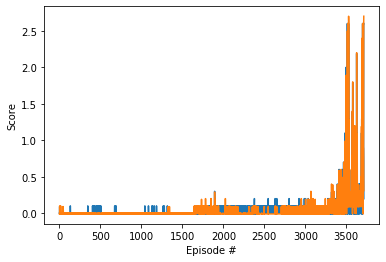

In [12]:
import random
import torch
import numpy as np
from collections import deque
import matplotlib.pyplot as plt
%matplotlib inline

def ddpg(n_episodes=5000, max_t=2000):
    prefill = 100
    scores_deque = deque(maxlen=100)
    hits_deque = deque(maxlen=100)
    hits_all = []
    scores = []
    max_score = -np.Inf
    for i_episode in range(1, n_episodes+1):
        env_info = env.reset(train_mode=True)[brain_name]     # reset the environment  
        states = env_info.vector_observations                 # get the current state
        multi_agent.reset()
        hits = 0
        
        score = [0.0 for _ in range(num_agents)]
        for t in range(max_t):
            
            actions_con = None 
            
            if n_episodes>prefill:
                actions = multi_agent.act(states)                 # get actions from all agents
                actions_con = np.concatenate(actions)
            else:
                actions = np.random.randn(num_agents, action_size) # select an action (for each agent)
                actions_con = np.clip(actions, -1, 1)                  # all actions between -1 and 1
                
            env_info = env.step(actions_con)[brain_name]     # send the action to the environment
            next_states = env_info.vector_observations        # get the next state
            rewards = env_info.rewards                        # get the reward
            dones = env_info.local_done                       # see if episode has finished
            
            multi_agent.step_add_to_memory(states, actions, rewards, next_states, dones)
            multi_agent.step_learn()
            
            states = next_states
            for i in range(num_agents):
                score[i] += rewards[i]

            if rewards[0]>0:
                hits +=1
                print(" [P1]")
            if rewards[1]>0:
                hits +=1
                print(" [P2]")
            if any(dones):
                break

        scores_deque.append(max(score))
        scores.append(score)
        hits_deque.append(hits)
        hits_all.append(hits)
        print('\rEpisode {}\tAverage Score: {:.4f}\t Hits: {:.1f} \t Average Hits {:.2f} \tScore: {:.4f} {:.4f}'.format(i_episode, np.mean(scores_deque), hits, np.mean(hits_deque), score[0], score[1]), end="")
        if i_episode % 25 == 0:
            #torch.save(agent.actor_local.state_dict(), 'checkpoint_actor.pth')
            #torch.save(agent.critic_local.state_dict(), 'checkpoint_critic.pth')
            print('\rEpisode {}\tAverage Score: {:.4f}\t---- '.format(i_episode, np.mean(scores_deque)))  
        if np.mean(scores_deque)>0.5:
            print("Solved")
            break
    return scores, hits_all

scores,hits_all = ddpg()

fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(1, len(scores)+1), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()

In [13]:
for i, agent in enumerate(multi_agent.agents):
    torch.save(agent.actor_local.state_dict(), 'checkpoint_actor_'+str(i)+'_final.pth')
    torch.save(agent.critic_local.state_dict(), 'checkpoint_critic_'+str(i)+'_final.pth')

In [18]:
all_scores = []
for i in range(1, 100):                                    # play game for 100 episodes
    env_info = env.reset(train_mode=True)[brain_name]      # reset the environment    
    states = env_info.vector_observations                  # get the current state (for each agent)
    scores = np.zeros(num_agents)                          # initialize the score (for each agent)
    steps = 0
    while True:
        steps +=1
        actions = multi_agent.act(states)                  # select an action (for each agent)
        env_info = env.step(actions)[brain_name]           # send all actions to tne environment
        next_states = env_info.vector_observations         # get next state (for each agent)
        rewards = env_info.rewards                         # get reward (for each agent)
        dones = env_info.local_done                        # see if episode finished
        scores += env_info.rewards                         # update the score (for each agent)
        states = next_states                               # roll over states to next time step
        if np.any(dones):                                  # exit loop if episode finished
            break
    all_scores.append(scores)

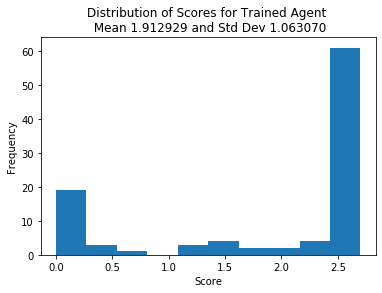

In [23]:
max_score=[max(score) for score in all_scores]
plt.xlabel('Score')
plt.ylabel('Frequency')
mean = np.mean(max_score)
std = np.std(max_score)
plt.title('Distribution of Scores for Trained Agent \n Mean {:2f} and Std Dev {:2f}'.format(mean, std))
plt.hist(max_score)
plt.savefig('tennis_solved.png')

In [27]:
all_scores = []
for i in range(1, 2):                                      # play game for 100 episodes
    env_info = env.reset(train_mode=False)[brain_name]     # reset the environment    
    states = env_info.vector_observations                  # get the current state (for each agent)
    scores = np.zeros(num_agents)                          # initialize the score (for each agent)
    steps = 0
    while True:
        steps +=1
        actions = multi_agent.act(states)                  # select an action (for each agent)
        env_info = env.step(actions)[brain_name]           # send all actions to tne environment
        next_states = env_info.vector_observations         # get next state (for each agent)
        rewards = env_info.rewards                         # get reward (for each agent)
        dones = env_info.local_done                        # see if episode finished
        scores += env_info.rewards                         # update the score (for each agent)
        states = next_states                               # roll over states to next time step
        if np.any(dones):                                  # exit loop if episode finished
            break
    all_scores.append(scores)

### 4. It's Your Turn!

Now it's your turn to train your own agent to solve the environment!  When training the environment, set `train_mode=True`, so that the line for resetting the environment looks like the following:
```python
env_info = env.reset(train_mode=True)[brain_name]
```

In [15]:
import torch.nn.functional as F
gamma = 0.99
tau = 1e-3

In [16]:
experiences = multi_agent.memory.sample()
indexes, states, actions, rewards, next_states, dones = experiences
actions_next = [agent.actor_target(next_obs) for (agent, next_obs) in zip(multi_agent.agents,next_states)]
actions_next_con = torch.cat(actions_next, dim=1)
next_states_con = torch.cat(next_states,dim=1)
actions_con = torch.cat(actions,dim =1)
states_con = torch.cat(states,dim=1)
dones_con = torch.cat(dones,dim=1)
gamma = 0.1

In [17]:
r=[multi_agent.memory.memory[i].rewards[1] for i in range(multi_agent.memory.memory.__len__())]

In [18]:
rx = []
for s in r:
    if s!=0:
        rx.append(s)

In [19]:
print(rx)

[]


In [20]:
next_states_con.shape
actions_next_con.shape

torch.Size([512, 4])

In [21]:
# TODO: Understand and clarify retain graph last retain graph also to be eliminated
for i,agent in enumerate(multi_agent.agents):
    print(i)
    Q_targets_next = agent.critic_target(next_states_con, actions_next_con)
    Q_targets = rewards[i] + (gamma * Q_targets_next * (1 - dones[i]))
    Q_expected = agent.critic_local(states_con, actions_con)
    critic_loss = F.mse_loss(Q_expected, Q_targets)
    print(critic_loss)
    agent.critic_optimizer.zero_grad()
    critic_loss.backward(retain_graph=True)
    torch.nn.utils.clip_grad_norm_(agent.critic_local.parameters(), 1)
    agent.critic_optimizer.step()

0
tensor(0.0003, grad_fn=<MeanBackward0>)
1
tensor(0.0003, grad_fn=<MeanBackward0>)


In [24]:
# Compute actor loss
for _ in range(10):
    for i,agent in enumerate(multi_agent.agents):
        actions_pred = agent.actor_local(states[i])

        actions_pred_con = torch.cat([multi_agent.agents[j].actor_local(state) if j==i \
                             else multi_agent.agents[i].actor_local(state).detach() \
                             for j,state in enumerate(states)], dim=1)
        print(actions_pred_con.shape)
        actor_loss = -agent.critic_local(states_con, actions_pred_con).mean()
        print(actor_loss)
        # Minimize the loss
        agent.actor_optimizer.zero_grad()
        actor_loss.backward()
        agent.actor_optimizer.step()

torch.Size([512, 4])
tensor(0.0145, grad_fn=<NegBackward>)
torch.Size([512, 4])
tensor(0.0145, grad_fn=<NegBackward>)
torch.Size([512, 4])
tensor(0.0144, grad_fn=<NegBackward>)
torch.Size([512, 4])
tensor(0.0145, grad_fn=<NegBackward>)
torch.Size([512, 4])
tensor(0.0143, grad_fn=<NegBackward>)
torch.Size([512, 4])
tensor(0.0145, grad_fn=<NegBackward>)
torch.Size([512, 4])
tensor(0.0142, grad_fn=<NegBackward>)
torch.Size([512, 4])
tensor(0.0145, grad_fn=<NegBackward>)
torch.Size([512, 4])
tensor(0.0141, grad_fn=<NegBackward>)
torch.Size([512, 4])
tensor(0.0145, grad_fn=<NegBackward>)
torch.Size([512, 4])
tensor(0.0140, grad_fn=<NegBackward>)
torch.Size([512, 4])
tensor(0.0145, grad_fn=<NegBackward>)
torch.Size([512, 4])
tensor(0.0138, grad_fn=<NegBackward>)
torch.Size([512, 4])
tensor(0.0145, grad_fn=<NegBackward>)
torch.Size([512, 4])
tensor(0.0137, grad_fn=<NegBackward>)
torch.Size([512, 4])
tensor(0.0144, grad_fn=<NegBackward>)
torch.Size([512, 4])
tensor(0.0135, grad_fn=<NegBackward

In [155]:
for agent in multi_agent.agents:
    agent.soft_update(agent.critic_local, agent.critic_target, tau)
    agent.soft_update(agent.actor_local, agent.actor_target, tau) 

In [29]:
k=0
test[0:k]+[17]+test[k+1:len(test)]

[17, 1, 2, 3, 4, 5, 6, 7, 8, 9]